In [1]:
# import Library yang dibutuhkan
import pandas as pd                   #dataframe manipulation
import numpy as np                    #scientific camputing
import seaborn as sns                 #visualization
import matplotlib.pyplot as plt       #visualization
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [5]:
# import csv
ca = pd.read_csv("C:/Users/HP/Desktop/Data Amazon/amz_ca.csv") 

ca.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",https://m.media-amazon.com/images/I/81cRe0AVC4...,https://www.amazon.ca/dp/B07CV4L6HX,4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,https://m.media-amazon.com/images/I/512CpB-EP5...,https://www.amazon.ca/dp/B09N1HGY74,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",https://m.media-amazon.com/images/I/61qJG-y1He...,https://www.amazon.ca/dp/B08NTR8NN4,4.2,46,18.99,0.00,Industrial Scientific,False,100


In [9]:
ca['listPrice'].value_counts()

listPrice
0.00      1999277
19.99        3602
29.99        3112
39.99        2729
16.99        2444
           ...   
251.51          1
144.25          1
162.31          1
127.23          1
264.98          1
Name: count, Length: 17129, dtype: int64

In [11]:
ca.shape

(2165926, 11)

In [13]:
# Hapus kolom yang tidak digunakan
ca = ca.drop(['imgUrl', 'productURL', 'listPrice'], axis=1) #listPrice dihapus karena missing value sejumlah 95%

ca.head()

,asin,title,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",4.4,2876,47.69,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,3.8,55,10.99,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",4.2,46,18.99,Industrial Scientific,False,100


In [15]:
# Rename kolom
ca = ca.rename(columns = {"asin" : "ID", 
                          "title" : "name",
                         "stars" : "rating",
                         "reviews" : "reviewCount",
                         "boughtInLastMonth" : "quantity"})

ca.head()

,ID,name,rating,reviewCount,price,categoryName,isBestSeller,quantity
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",4.4,2876,47.69,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,3.8,55,10.99,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",4.2,46,18.99,Industrial Scientific,False,100


In [17]:
# Menunjukkan Duplicates
ca[ca.duplicated()]

,ID,name,rating,reviewCount,price,categoryName,isBestSeller,quantity


In [19]:
# Cek Missing Values
print(ca.isnull().sum())

ID              0
name            6
rating          0
reviewCount     0
price           0
categoryName    0
isBestSeller    0
quantity        0
dtype: int64


In [21]:
'''Yang NaN ga ada, tapi banyak yang 0'''

#Cek dari frekuensi & histogram
ca['quantity'].value_counts()

quantity
0        2056531
50         52725
100        29475
200        10317
300         4944
400         3005
1000        2353
500         1931
600         1337
700          912
800          813
900          565
2000         537
3000         227
4000          97
5000          55
6000          30
10000         26
7000          18
8000          16
9000           9
20000          3
Name: count, dtype: int64

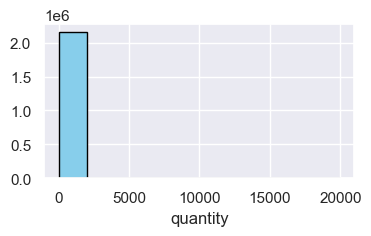

In [23]:
# Histogram untuk memperjelas persebaran data
plt.figure(figsize=(4, 2))
plt.hist(ca['quantity'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('quantity')
plt.show()

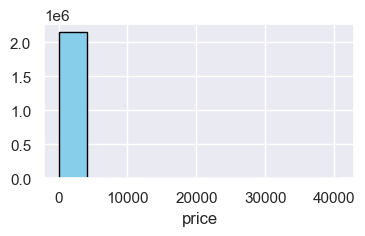

In [25]:
''' Quantity 0 terlalu banyak, akan dihapus '''

# Cek data Price
plt.figure(figsize=(4, 2))
plt.hist(ca['price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('price')
plt.show()

In [27]:
# Hapus baris di mana kolom 'price' atau 'quantity' mengandung 0
ca = ca[(ca['price'] != 0) & (ca['quantity'] != 0)].dropna()

ca['quantity'].value_counts()

quantity
50       51391
100      28725
200      10063
300       4843
400       2936
1000      2281
500       1867
600       1310
700        885
800        793
900        555
2000       522
3000       222
4000        93
5000        54
6000        30
10000       22
7000        18
8000        15
9000         9
20000        3
Name: count, dtype: int64

In [29]:
ca.count()

ID              106637
name            106637
rating          106637
reviewCount     106637
price           106637
categoryName    106637
isBestSeller    106637
quantity        106637
dtype: int64

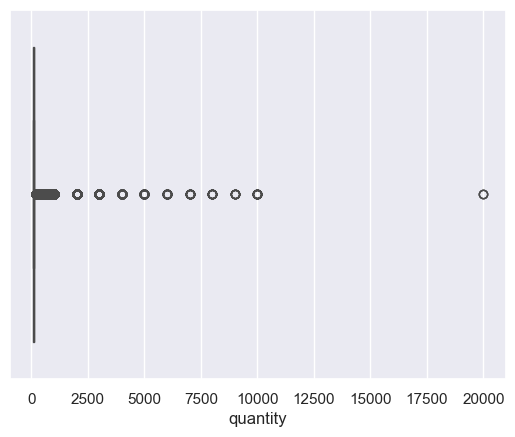

In [31]:
# Cek outlier
sns.boxplot(x=ca['quantity'])
plt.show()

In [33]:
'''range quantity dibatasi 400'''
ca = ca[ca['quantity'] <= 400]
ca.shape

(97958, 8)

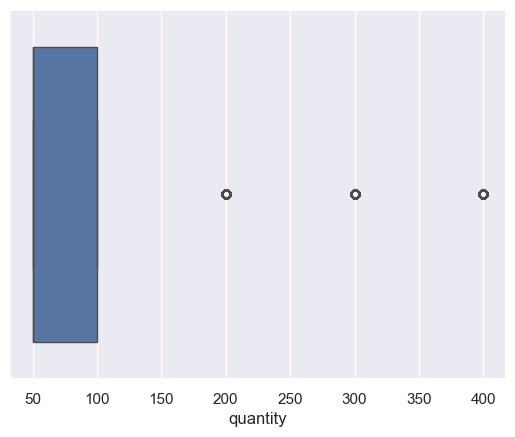

In [35]:
# Setelah outlier quantity dibuang
sns.boxplot(x=ca['quantity'])
plt.show()

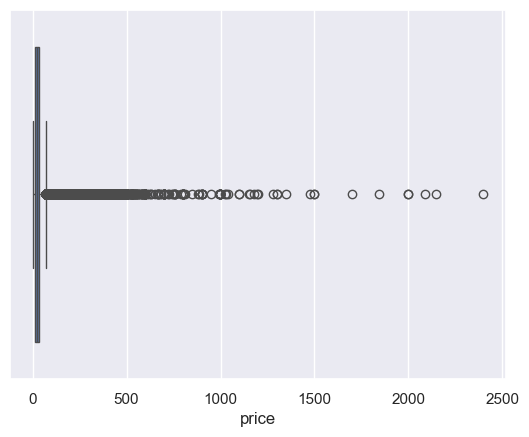

In [37]:
# Cek outlier price
sns.boxplot(x=ca['price'])
plt.show()

In [39]:
ca['price'].value_counts()

price
19.99     3121
29.99     2430
14.99     2196
39.99     1899
16.99     1871
          ... 
56.80        1
106.98       1
107.68       1
321.00       1
148.89       1
Name: count, Length: 7793, dtype: int64

In [41]:
''' Generate new column (City) '''
# Kota-kota populer di Kanada
cities = ['Toronto', 'Vancouver', 'Montreal', 'Calgary', 'Ottawa',
          'Edmonton', 'Winnipeg', 'Quebec City', 'Hamilton', 'Halifax']

# Distribusi probabilitas (tidak rata)
probabilities = [0.25, 0.2, 0.15, 0.1, 0.1, 0.08, 0.05, 0.04, 0.02, 0.01]

# Tambahkan kolom 'city' dengan nilai random berdasarkan probabilitas
ca['city'] = np.random.choice(cities, size=len(ca), p=probabilities)

ca.head()

,ID,name,rating,reviewCount,price,categoryName,isBestSeller,quantity,city
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,3.8,55,10.99,Industrial Scientific,False,100,Toronto
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,Industrial Scientific,False,50,Toronto
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,Industrial Scientific,False,100,Montreal
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",4.2,46,18.99,Industrial Scientific,False,100,Vancouver
6,B07RQ5389H,REAQER CPAP Hose Holder Hanger for Preventing ...,4.3,216,27.99,Industrial Scientific,False,50,Edmonton


In [43]:
# Export into CSV
ca.to_csv("C:/Users/HP/Desktop/Data Amazon/AmazonCa.csv", index=False)